This code performs Seismic Refraction Tomography with pyGimli
==========================================================================================
_author: Alberto Carrera_

In [2]:
# Import the packages needed to realize the inversion modelling
import pygimli as pg
from pygimli.physics import TravelTimeManager
import matplotlib.pyplot as plt
import numpy as np
import pygimli.meshtools as mt

datadir = '../data/seismic/'
figdir = '../figures/'
loopdir = datadir+ 'inv_loop/'

fname = 'asolo_roll'

data = pg.load(datadir + fname + ".sgt")
#data.remove(data["g"] == data["s"])
data.set("err", pg.Vector(data.size(), 0.002)) #.003 means 1. msec
print(data)


mgr = TravelTimeManager()
ax, cbar = mgr.showData(data)

# see traveltime curves  
fig, ax = pg.plt.subplots(figsize=(8,4))
pg.physics.traveltime.drawFirstPicks(ax, data)
plt.title(fname)

11/06/25 - 15:17:06 - pyGIMLi - INFO - Reading ../data/tommaso/l1.sgt (<function load at 0x7aec1a6ef380>)
73.5 0 11/06/25 - 15:17:06 - pyGIMLi - WARNING - ./core/src/datacontainer.cpp:307		virtual int GIMLI::DataContainer::load(const std::string&, bool, bool)  cannot determine data size. 2

11/06/25 - 15:17:06 - pyGIMLi - WARNING - File extension .sgt seems to be not correct. Trying auto-detect.


Traceback (most recent call last):
  File "/home/alberto/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/core/load.py", line 191, in load
    return importer(fname)
           ^^^^^^^^^^^^^^^
  File "/home/alberto/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/traveltime/importData.py", line 32, in load
    data = DataContainerTT(fileName)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/alberto/anaconda3/envs/pg/lib/python3.11/site-packages/pygimli/physics/traveltime/tt.py", line 39, in __init__
    self.load(data)
RuntimeError: ./core/src/datacontainer.cpp:307		virtual int GIMLI::DataContainer::load(const std::string&, bool, bool)  cannot determine data size. 2


73.5 0 
73.5 0 
73.5 0 
73.5 0 
73.5 0 
73.5 0 
73.5 0 


AttributeError: 'DataMap' object has no attribute 'set'

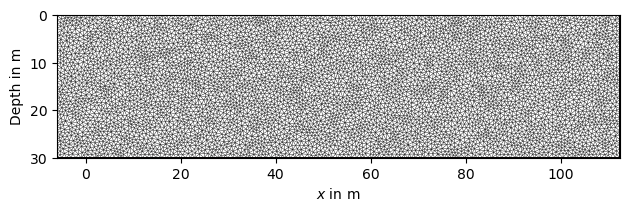

In [3]:
# create mesh ----> 0.25m spacing
world = mt.createWorld(
    start=[-6, 0], end=[71*1.5+6, -30], area=.5) #worldMarker=False, marker=2)
    
# local refinement of mesh near electrodes
mesh = mt.createMesh(world, quality=33)
pg.show(mesh)

nv = np.linspace(1,9,8)
li = 10
s = 0

04/03/25 - 16:07:48 - pyGIMLi - INFO - Found 1 regions.
04/03/25 - 16:07:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/03/25 - 16:07:48 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.


Directory ../data/seismic/inv_loop/ created.


04/03/25 - 16:07:49 - pyGIMLi - INFO - Create gradient starting model. 50: 2500
04/03/25 - 16:09:26 - pyGIMLi - INFO - Found 1 regions.
04/03/25 - 16:09:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/03/25 - 16:09:26 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
04/03/25 - 16:09:27 - pyGIMLi - INFO - Create gradient starting model. 50: 2500
04/03/25 - 16:11:01 - pyGIMLi - INFO - Found 1 regions.
04/03/25 - 16:11:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/03/25 - 16:11:01 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
04/03/25 - 16:11:02 - pyGIMLi - INFO - Create gradient starting model. 50: 2500
04/03/25 - 16:12:27 - pyGIMLi - INFO - Found 1 regions.
04/03/25 - 16:12:27 - pyGIMLi - INFO - Creating forward mesh from region infos.
04/03/25 - 16:12:27 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
04/03/25 - 16:12:28 - pyGIMLi - INFO - Create gradient sta

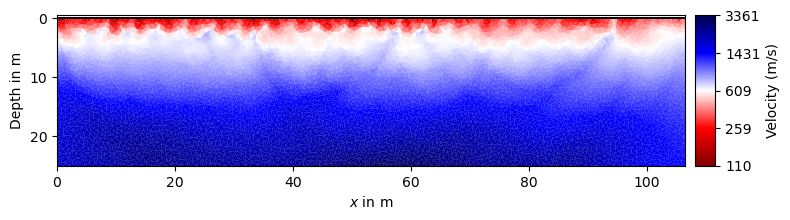

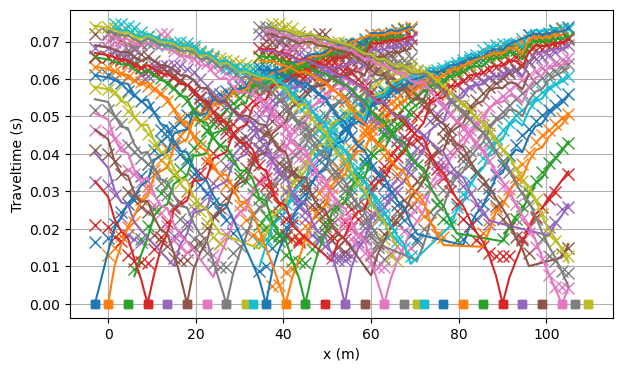

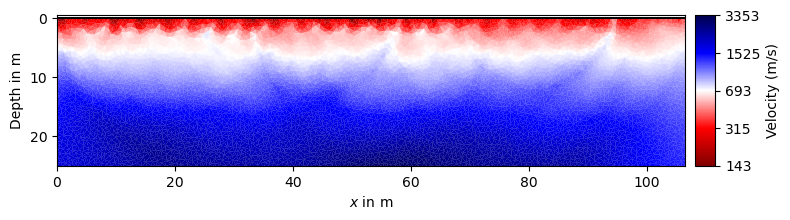

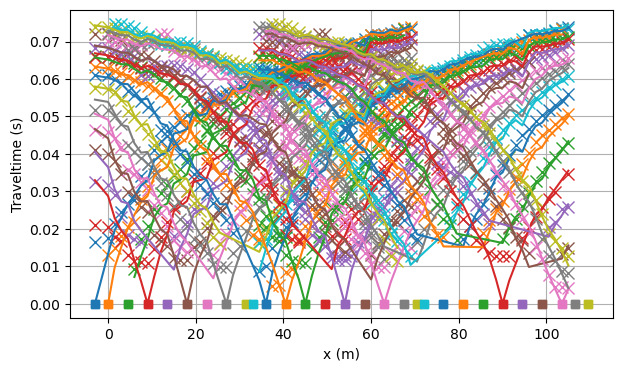

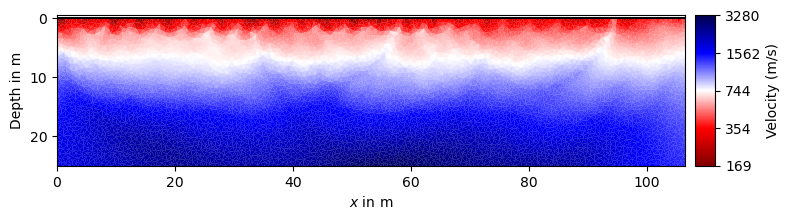

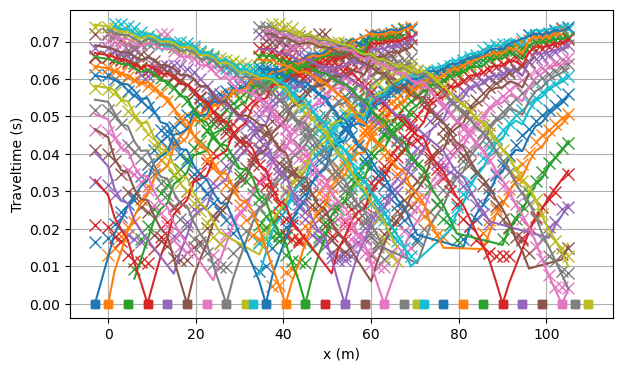

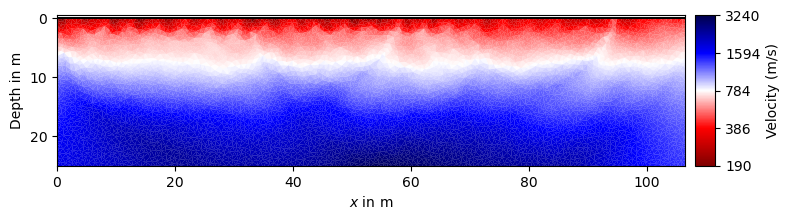

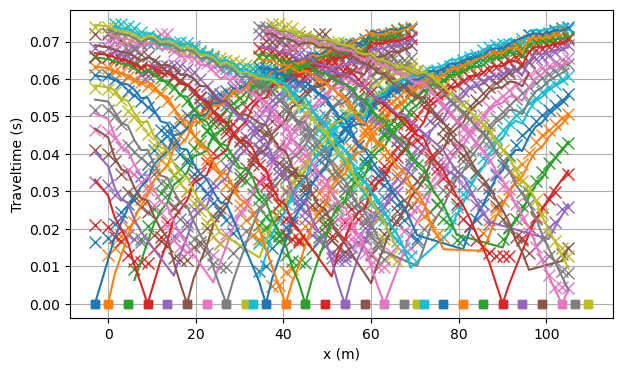

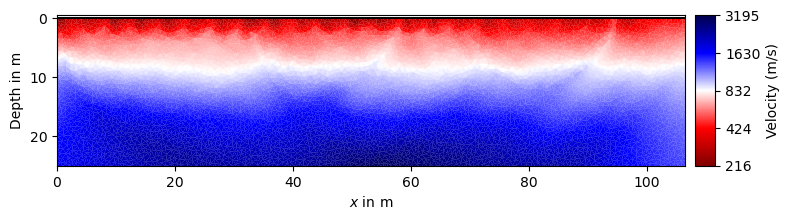

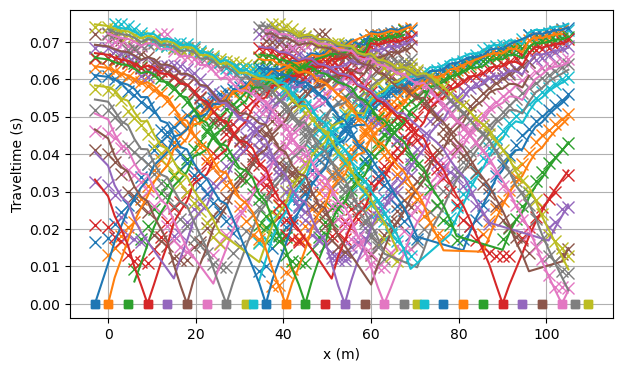

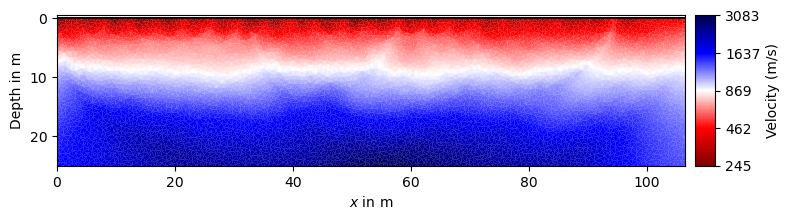

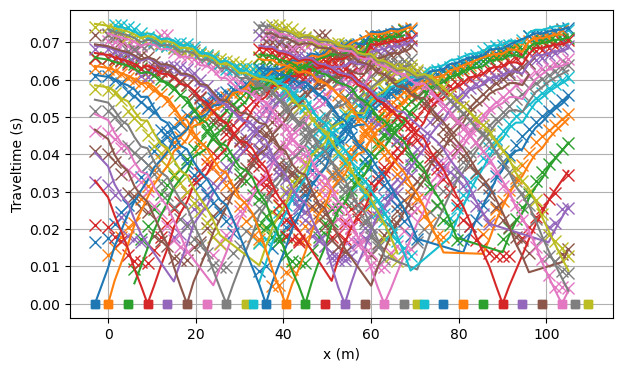

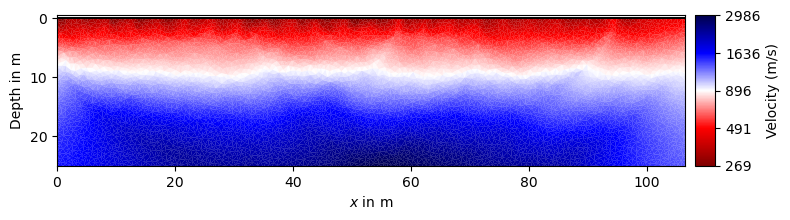

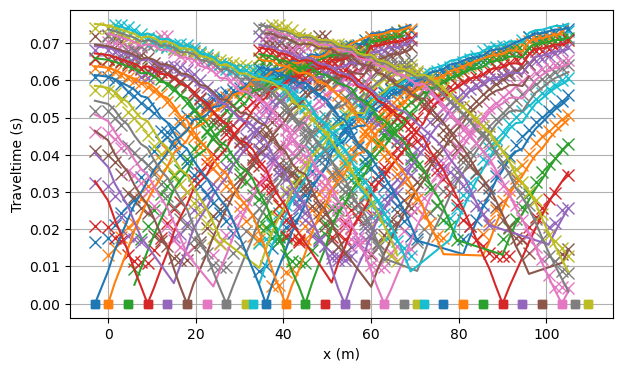

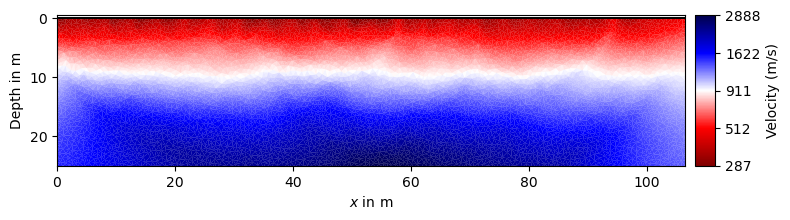

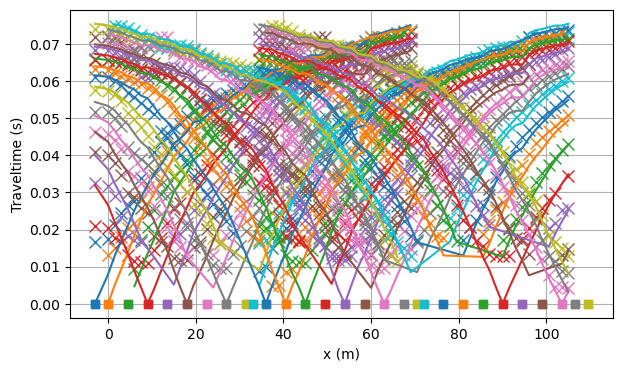

In [7]:
import os

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(loopdir):
    os.makedirs(loopdir)
    print(f"Directory {loopdir} created.")

# Run the inversion loop
for i in range(len(nv)):
    li = li*(3/2) 
    # run the inversion, the mesh is created based on the sensors and shots positions
    inverted = mgr.invert(data, mesh = mesh, lam = li, maxIter=10, #zWeight=0.25,
                          vTop=50, vBottom=2500, verbose=False)

    plt.rcParams['figure.figsize'] = [8, 3.5]
    vp , cbar = mgr.showResult(# color map settings, Cmin = Vp minimum of the colorbar, Cmax = Vp maximum value of the colorbar
                          cMap='seismic_r',#cMin=200,cMax=2400,
                          sens=True,
                          logScale = True, orientation='vertical')
    vp.set_xlim(0, 71*1.5)
    vp.set_ylim(-25, 0.5)
    # Sensors and shot (use "diam" to increase/decrease the size of sensors/shot)

    #plt.savefig(loopdir + 'vpsec_%s.png' %s, dpi=100)
    
    plt.rcParams['figure.figsize'] = [7,4]
    fig = mgr.showFit() 
    #plt.savefig(loopdir + 'vpfit_%s.png' %s, dpi=100)
    
    
    file = open(loopdir + "param_%s.txt" % s, "w")
    lambdaa = repr(li)
    chii = mgr.inv.chi2()
    chiii = repr(chii)
    relrmss = mgr.inv.relrms()
    relrmsss = repr(relrmss)
    file.write("\n" + "lamdav = " + lambdaa + "\n" + "chi2 = " + chiii + "\n" + "rrms = " + relrmsss)
    file.close()
    
    s = s+1

Number of files in the list 8
       lamdav      chi2       rrms
5   15.000000  1.469782  12.839470
1   22.500000  1.544135  13.299712
7   33.750000  1.638680  13.703636
6   50.625000  1.750378  14.154852
0   75.937500  1.903493  14.612356
2  113.906250  2.067560  15.124434
3  170.859375  2.252449  15.604147
4  256.289062  2.471188  16.095801


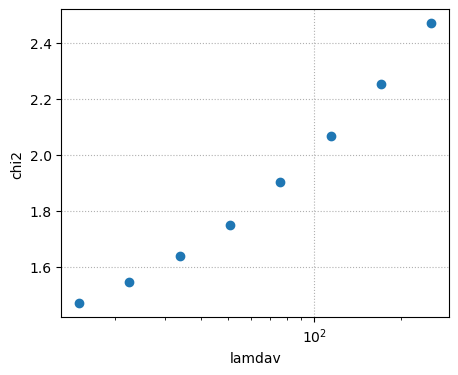

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os
# read the .txt file list
file_list = glob.glob(loopdir +'*.txt')
print("Number of files in the list", len(file_list))
#print(file_list)

# merge them with a dictionary
data_list = []

for filename in os.listdir(loopdir):
    if filename.endswith(".txt"):
        filepath = os.path.join(loopdir, filename)
        with open(filepath, "r") as f:
            data = {}
            for line in f:
                line = line.strip()
                if line:  # ignore blank lines
                    key, value = line.split(" = ")
                    try:
                        value = float(value)
                    except ValueError:
                        pass  # ignore non-numeric values
                    data[key] = value
            data_list.append(data)
#print(data_list)

# create a dataframe
df = pd.DataFrame(data_list, columns=["lamdav", "chi2", "rrms"])
df = df.sort_values("lamdav", ascending=True)  # sort by lamdav in ascending order
df.to_csv(loopdir + "output.csv", index=False)
print(df)

#plot
fig = plt.figure(figsize=(5, 4))
plt.scatter(df["lamdav"], df["chi2"])
plt.xscale("log")
plt.xlabel("lamdav")
plt.ylabel("chi2")
plt.grid(linestyle=':')
plt.show()

# invert roll

Data: Sensors: 74 data: 1702, nonzero entries: ['err', 'g', 's', 't', 'valid']


05/06/25 - 18:31:55 - pyGIMLi - INFO - 184 data of 1702 not shown


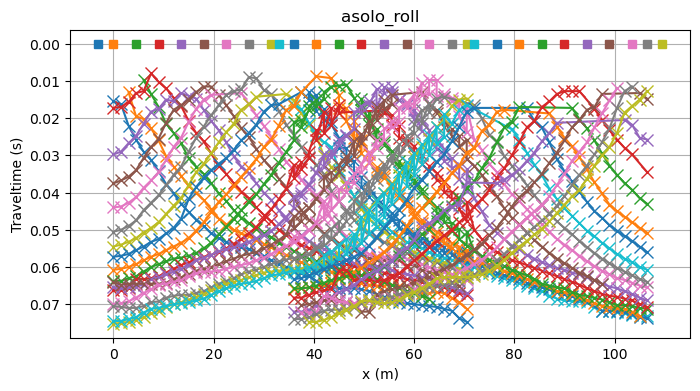

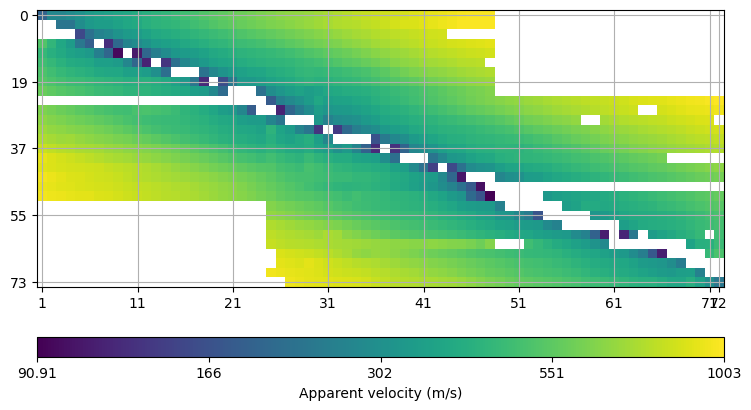

In [18]:
lam = 100

data = pg.load(datadir + fname + ".sgt")

# Define the error in the seismic dataset in sec (e.g. 0.0005 means 0.5 msec)
data.set("err", pg.Vector(data.size(), 0.002))
print(data)

# see traveltime curves  
fig, ax = pg.plt.subplots(figsize=(8,4))
pg.physics.traveltime.drawFirstPicks(ax, data)
plt.title(fname)

# Initialize the refraction manager
mgr = TravelTimeManager()
ax, cbar = mgr.showData(data)

In [19]:
# set parameters and run the inversion
minvel = 200
maxvel = 2500

#weight = 0.25

inverted = mgr.invert(data, mesh = mesh,
                      lam = lam,
                      maxIter=10, #zWeight=weight,
                      vTop=minvel, vBottom=maxvel, verbose=False)

print("RST chi:", mgr.inv.chi2())
print("RST rms:", mgr.inv.relrms())

05/06/25 - 18:31:56 - pyGIMLi - INFO - Found 1 regions.
05/06/25 - 18:31:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
05/06/25 - 18:31:56 - pyGIMLi - INFO - Creating refined mesh (secnodes: 2) to solve forward task.
05/06/25 - 18:31:57 - pyGIMLi - INFO - Create gradient starting model. 200: 2500


RST chi: 1.1700547982300566
RST rms: 13.508083525594062


Text(0.5, 1.0, 'asolo_rol                                                                                                                              $\\chi^2$=1.2, rrmse=13.5')

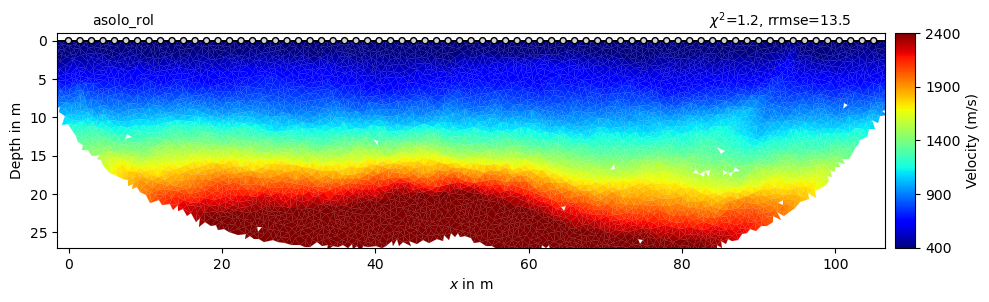

In [20]:
figdir = '../figures/'

# Vp section
x_sens = np.arange(0, 71*1.5, 1.5)
sensors = np.zeros((len(x_sens), 2))
sensors[:, 0] = x_sens 

vmin, vmax = 400, 2400
#plot
plt.rcParams['figure.figsize'] = [10, 4.5]
vp , cbar = mgr.showResult(sens=True, orientation='vertical',
                           logScale = False,
                           coverage=mgr.standardizedCoverage(),
                           cMap='jet',cMin=vmin,cMax=vmax,
                          )
#rays = mgr.drawRayPaths(ax=vp, color="w", lw=0.01, alpha=0.5)

pg.viewer.mpl.drawSensors(vp, sensors, diam=.8, coords=[0, 1],
                         facecolor='lightgray', edgecolor='black')

vp.set_xlim(-1.5, 71*1.5)
vp.set_ylim(-27, 1)
vp.set_title(fname[:-1] + f'                                                                                                                              $\chi^2$={mgr.inv.chi2():.1f}, '+f'rrmse={mgr.inv.relrms():.1f}', fontsize=10)
#plt.savefig(figdir + fname[:-1]+'_srt.png', dpi=200)

In [9]:
import os

# Define output directory
outdir = datadir+'inv_gimli/'

# Check if the directory exists, and create it if it doesn't
if not os.path.exists(outdir):
    os.makedirs(outdir)
    print(f"Directory {outdir} created.")

# Save the output file with Vp values and the section covered by the ray path
mgr.saveResult(folder=outdir, size=(8, 3))  # Add any other arguments like cMin, cMax if needed


Path ../data/seismic/inv_gimli/TravelTimeManager already exists. Skipping


'../data/seismic/inv_gimli/TravelTimeManager'

In [10]:
result = mgr.paraDomain
result.addData("Vel", mgr.velocity)
result.addData("Cov", mgr.standardizedCoverage())

result.exportMidCellValue(outdir+ 'model-'+ fname+ '.dat', result.data('Vel'), result.data('Cov'))
result.data

<bound method data of Mesh: Nodes: 6182 Cells: 12044 Boundaries: 318
Mesh contains data: Cov, Vel>

In [12]:
import pandas as pd          

# Caricamento
model = pd.read_csv(outdir + 'model-' + fname + '.dat', sep='\t')
model.columns = ["X", "Y", "Vel", "Cov", " "]
model.to_csv(outdir + 'model-' + fname + '.csv', sep=',')